In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.5 MB/s eta 0:00:00


In [ ]:
#mounting for using dataset and saving work
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math
import numpy as np

In [ ]:
#All the stock market abbrevations used for companies
stocks = {'AXP':'American Express Financial services',
'AAPL':'Apple Technology',
'AMZN':'Amazon.com E-commerce',
'ADBE':'Adobe Computer software',
'ADS':'Alliance Data Systems Corporation',
'BA':'Boeing Aerospace',
'BAC':'Bank of America Investment banking',
'CAT':'Caterpillar Inc. Construction machinery and equipment',
'CVX':'Chevron Corporation Oil industry',
'CSCO':'Cisco Systems Networking hardware',
'COST':'Costco Retail',
'DIS':'The Walt Disney Company Mass media',
'FB':'Facebook Social Media',
'GE':'General Electric Multinational conglomerate',
'GS':'Goldman Sachs Investment banking',
'GOOGL':'Alphabet Inc. Multinational conglomerate',
'HD':'The Home Depot Home improvement',
'HDB':'HDFC Bank Financial services',
'HOG':'Harley:Davidson motorcycle manufacturer',
'IBM':'IBM Computer hardware',
'INTC':'Intel Semiconductor',
'INFY':'Infosys Information technology consulting',
'JNJ':'Johnson & Johnson Medical device',
'JPM':'JPMorgan Chase Investment banking',
'JBHT':'J.B. Hunt Transportation and Logistics',
'KO':'The Coca:Cola Company Beverages',
'KEX':'Kirby Corporation Transportation',
'MCD':"McDonald's Fast food",
'MSFT':'Microsoft Corporation Technology',
'MMM':'3M Multinational conglomerate',
'MRK':'Merck & Co. Pharmaceutical',
'NFLX':'Netflix Production',
'NKE':'Nike Footwear manufacturing',
'NVDA':'Nvidia Computer Hardware and Software',
'PFE':'Pfizer Pharmaceutical',
'PG':'Procter & Gamble Consumer Goods',
'PEP':'PepsiCo Food',
'REGN':'Regeneron Pharmaceuticals Biotechnology',
'SBUX':'Starbucks Coffeehouse',
'TRV':'The Travelers Companies Insurance',
'TGT':'Target Corporation Retail',
'T':'AT&T Telecommunications',
'UTX':'Raytheon Technologies Corporation Aircraft manufacturing',
'UNH':'UnitedHealth Group Managed care',
'UPS':'United Parcel Service Logistics',
'UNP':'Union Pacific Corporation Transport',
'VZ':'Verizon Communications Telecommunications',
'WMT':'Walmart Retail',
'XOM':'ExxonMobil multinational oil and gas',
'YUM':'Yum! Brands Fast food'}

In [ ]:
path='drive/My Drive/DS340W/DIS_2006-01-01_to_2020-09-30.csv'
  #reading dataset by indexing 'Date' column for ARIMA function properly
data = pd.read_csv(path, index_col='Date', parse_dates=['Date'])
  #droping column
data = data.drop(['Name'], axis=1)
data = data['Adj Close']

In [ ]:
  #changing dataset to log(dataset) values
data = np.log(data)
  #splitting dataset for train and test
train_data, test_data = data[3:int(len(data)*0.9)], data[int(len(data)*0.9):]

In [ ]:
  #calculating p,d,q values for ARIMA based on training data
  #auto_arima process identifies the most optimal parameters for an ARIMA model
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       #type of root test
                      max_p=4, max_q=4, #max_p is the max value of AR and max_q is the max value of MA
                      m=1,              #annual data
                      d=None,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
#summary to choose p,d,q value and update it accordingly in arima function
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18035.649, Time=0.57 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-18046.066, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18047.858, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18034.189, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18048.950, Time=2.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-18058.310, Time=3.50 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-18059.402, Time=0.64 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-18061.434, Time=0.83 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-18059.683, Time=2.64 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-18059.356, Time=0.92 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-18057.745, Time=1.33 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-18059.282, Time=0.35 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 14.623 seconds
                               SARIMAX Results                 

In [ ]:
  #using the predicted p,d,q value from above result to train the arima model
model = ARIMA(train_data, order=(4, 1, 2))
  #fits model by exact maximum likelihood
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3337
Model:                 ARIMA(4, 1, 2)   Log Likelihood                9033.628
Date:                Thu, 02 Nov 2023   AIC                         -18053.257
Time:                        22:45:43   BIC                         -18010.469
Sample:                             0   HQIC                        -18037.949
                               - 3337                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0302      6.783     -0.004      0.996     -13.324      13.263
ar.L2         -0.0330      2.085     -0.016      0.987      -4.120       4.054
ar.L3          0.0383      0.540      0.071      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


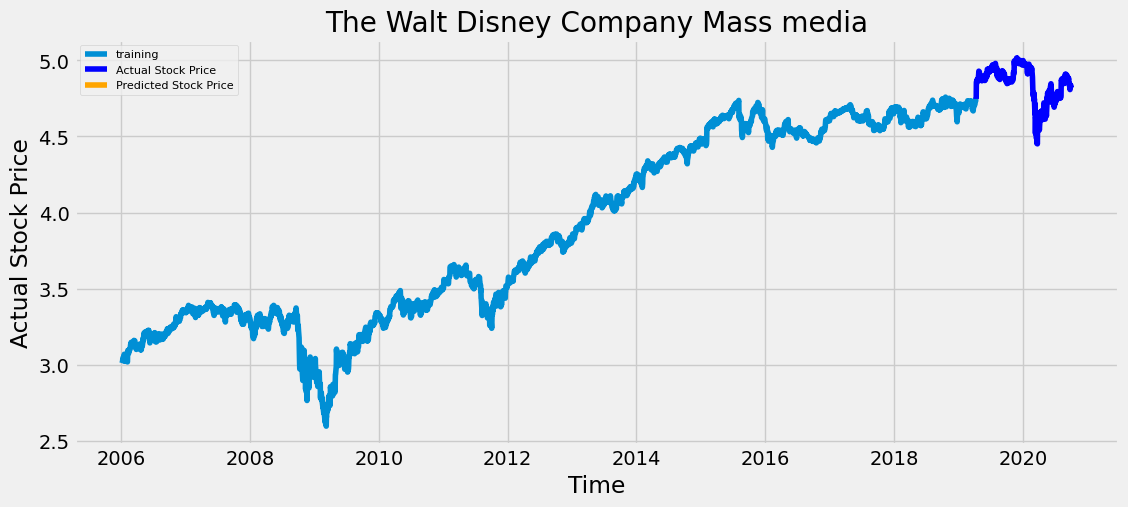

In [ ]:
  #forecast or predicting the stock prices and comparing it in the graph
#fc, se, conf = fitted.forecast(len(test_data), alpha=0.05)  # 95% confidence

forecast_result = fitted.forecast(len(test_data), alpha=0.05)

if len(forecast_result) == 3:
    fc, se, conf = forecast_result
    fc_series = pd.Series(fc, index=test_data.index)
    lower_series = pd.Series(conf[:, 0], index=test_data.index)
    upper_series = pd.Series(conf[:, 1], index=test_data.index)
else:
    # Handle the case where the method returns only two values
    # Modify this part based on what the method returns
    fc = forecast_result
    conf = forecast_result
    fc_series = pd.Series(fc, index=test_data.index)
    lower_series = pd.Series(conf, index=test_data.index)
    upper_series = pd.Series(conf, index=test_data.index)

'''
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
'''
  #plotting the forecasted data with the original data in the same graph
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
plt.title(stocks['DIS'])
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)

plt.savefig('drive/My Drive/DS340W/new_arima_'+'DIS'+'.png')

plt.show()

In [ ]:
# Generate error data
  #mean squared error
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
  #mean absolute error
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
  #root mean squared error
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
  #mean absolute percentage error
mape = mean_absolute_percentage_error(test_data, fc)
print('MAPE: '+str(mape))

MSE: 0.023415245807009436
MAE: 0.13661487465187516
RMSE: 0.15302040977271442
MAPE: 0.02801437515538691
